### User Level Analysis from Click thru' logs

In [1]:
setwd("/media/deepak/OS")

In [2]:
library(sqldf);
library(rjson);
library(RCurl);
library(tm);
library(SnowballC);

Loading required package: gsubfn
Loading required package: proto
Loading required package: RSQLite
Loading required package: DBI
Loading required package: bitops
Loading required package: NLP


In [3]:
user=read.csv("userpref.txt",sep="|",quote="");

In [5]:
ds=read.csv("queries_5dnew1.csv",sep="|")
names(ds)=c('email','keyword');

In [6]:
trim <- function (x) gsub("^\\s+|\\s+$", "", x)
cleanq=sapply(ds$email,function(x) trim(gsub("\"","",x)));
ds1=cbind(ds,cleanq);

In [25]:
comp=sqldf("select a.*,replace(b.keyword,' ,',',')as keyword,case when birthday != 'NULL' then (date('now') - birthday) else null end as age from user a,ds1 b where a.email = b.cleanq");

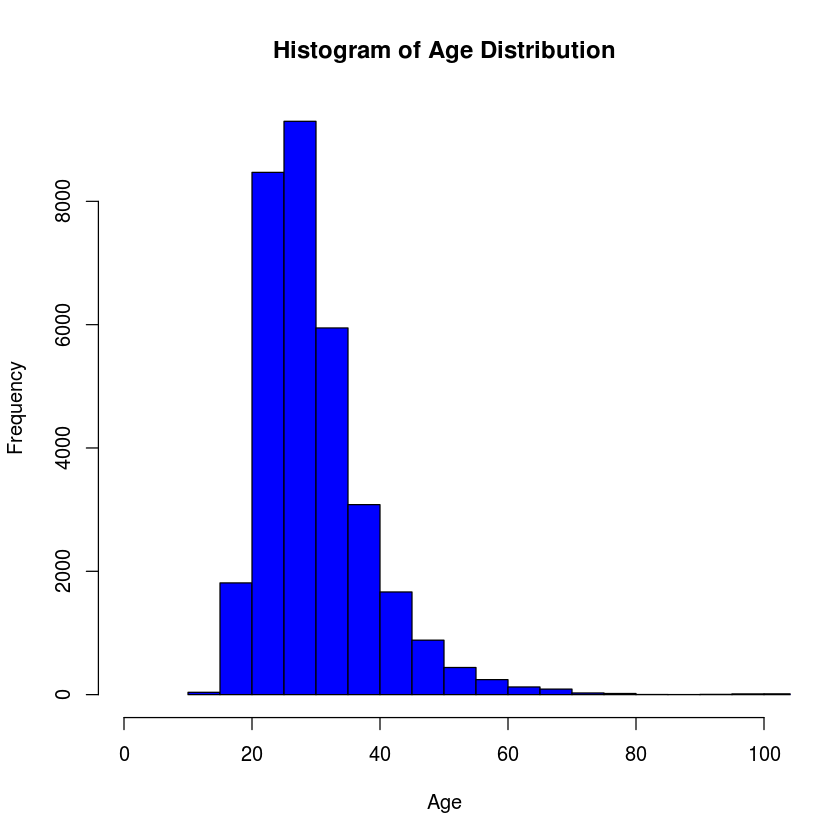

In [24]:
hist(as.numeric(comp$age),breaks=600,xlim=c(0,100),xlab="Age",main="Histogram of Age Distribution",col="blue")

In [42]:
sqldf("select email,display_name,first_name,gender,age,keyword from comp where age is not null and age < 20 and gender='f' and gender != 'NULL' limit 5")

,email,display_name,first_name,gender,age,keyword
1,mehlawat56@gmail.com,James Mehlawat,nitin,f,111,"( iphone 6, iphone 6s, iphone 6s covers)"
2,yejaswitlak@gmail.com,Yejaswi Agrawal,NULL,f,19,"( micromax bolt a67 mobile, micromax bolt a67)"
3,swetaoom@gmail.com,SWETA SRIVASTAVA,SWETA,f,15,"( speakers, mini portable speaker, intex portable speaker, ro membrane 80 gpd, ro membrane, ro membrane 100 gpd, ro membrane 90 gpd, aquaguard ro membrane, speaker with woofers)"
4,chandravanshit30@gmail.com,Tanya Chandravanshi,tanya,f,19,"( tees, t shirts)"
5,mishra.adi06@gmail.com,Adyasha Mishra,adyasha,f,19,"( wonderchef granite, wonderchef diamond, wonderchef)"


In [44]:
a20=sqldf("select group_concat(keyword) from comp where age < 20")
a30=sqldf("select group_concat(keyword) from comp where age < 30 and age >= 20")
a40=sqldf("select group_concat(keyword) from comp where age < 40 and age >= 30")
a50=sqldf("select group_concat(keyword) from comp where age < 50 and age >= 40")
a60=sqldf("select group_concat(keyword) from comp where age >= 50")

In [51]:
src=c(a20,a30,a40,a50,a60)
str(src)

List of 5
 $ group_concat(keyword): chr "( samsung headphone),( handkerchiefs caps socks mittens & accessories,  handkerchief for man,  Mask,  hanky,  pocket knife,  fo"| __truncated__
 $ group_concat(keyword): chr "( iphone 5s),( tap,  power bank),( iBall Claro CTV27 TV Tuner Card),( televisions,  EURO GLITZ PLUS,  haier refrigerator),( bla"| __truncated__
 $ group_concat(keyword): chr "( venus weighing scale),( talwalkars,  weight loss,  weight loss program,  Reduce),( sports shoes fspor men,  sports items),( h"| __truncated__
 $ group_concat(keyword): chr "( dth box,  d t h,  casio watches,  casio watches for women,  st s2,  dd dth,  dd direct set top box,  watches,  led tv,  mobil"| __truncated__
 $ group_concat(keyword): chr "( mens clothing),( gillette,  lakme,  dabur almond hair oil,  phone charger,  ky jelly,  dabur almond oil,  gillette mach3 blad"| __truncated__


In [53]:
library(tm)
docs = Corpus(VectorSource(src)) 
inspect(docs)

<<VCorpus>>
Metadata:  corpus specific: 0, document level (indexed): 0
Content:  documents: 5

$`group_concat(keyword)`
<<PlainTextDocument>>
Metadata:  7
Content:  chars: 66673

$`group_concat(keyword)`
<<PlainTextDocument>>
Metadata:  7
Content:  chars: 917386

$`group_concat(keyword)`
<<PlainTextDocument>>
Metadata:  7
Content:  chars: 559912

$`group_concat(keyword)`
<<PlainTextDocument>>
Metadata:  7
Content:  chars: 170132

$`group_concat(keyword)`
<<PlainTextDocument>>
Metadata:  7
Content:  chars: 56895



In [54]:
doc.corpus <- tm_map(docs, tolower)
doc.corpus <- tm_map(doc.corpus, removePunctuation)
doc.corpus <- tm_map(doc.corpus, removeNumbers)
doc.corpus <- tm_map(doc.corpus, removeWords,stopwords("english"))
doc.corpus <- tm_map(doc.corpus, stemDocument)
doc.corpus <- tm_map(doc.corpus, stripWhitespace)
doc.corpus <- tm_map(doc.corpus, PlainTextDocument)

In [213]:
# Lets try tfidf weighting
dtm <- DocumentTermMatrix(doc.corpus,control = list(weighting = weightTfIdf));   

In [57]:
dtm

<<DocumentTermMatrix (documents: 5, terms: 12939)>>
Non-/sparse entries: 19927/44768
Sparsity           : 69%
Maximal term length: 31
Weighting          : term frequency - inverse document frequency (normalized) (tf-idf)

In [61]:
dtmmat[1000:1010,1:5]

,character(0),character(0),character(0),character(0),character(0)
bazaar,0.000000e+00,2.777674e-05,2.236923e-05,3.653590e-05,0.000000e+00
bazar,0.000000e+00,4.375754e-05,0.000000e+00,0.000000e+00,0.000000e+00
bblunt,0.000000e+00,0.000000e+00,3.523893e-05,0.000000e+00,0.000000e+00
bboy,0.000000e+00,0.000000e+00,3.523893e-05,0.000000e+00,0.000000e+00
bbpa,0.0000000000,0.0000000000,0.0000000000,0.0001151122,0.0000000000
bbq,0.000000e+00,2.187877e-05,0.000000e+00,0.000000e+00,0.000000e+00
bcaa,0.000000e+00,4.982438e-05,4.012469e-05,0.000000e+00,0.000000e+00
bcc,0.000000e+00,2.187877e-05,0.000000e+00,0.000000e+00,0.000000e+00
bce,0.000000e+00,2.187877e-05,0.000000e+00,0.000000e+00,0.000000e+00
bcrumbsearch,0.000000e+00,2.187877e-05,0.000000e+00,0.000000e+00,0.000000e+00


In [62]:
findFreqTerms(dtm,700,900)

character(0)

In [84]:
inspect(dtm[1:5,1000:1010])

<<DocumentTermMatrix (documents: 5, terms: 11)>>
Non-/sparse entries: 14/41
Sparsity           : 75%
Maximal term length: 12
Weighting          : term frequency - inverse document frequency (normalized) (tf-idf)

              Terms
Docs                 bazaar        bazar       bblunt         bboy         bbpa
  character(0) 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.0000000000
  character(0) 2.777674e-05 4.375754e-05 0.000000e+00 0.000000e+00 0.0000000000
  character(0) 2.236923e-05 0.000000e+00 3.523893e-05 3.523893e-05 0.0000000000
  character(0) 3.653590e-05 0.000000e+00 0.000000e+00 0.000000e+00 0.0001151122
  character(0) 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.0000000000
              Terms
Docs                    bbq         bcaa          bcc          bce bcrumbsearch
  character(0) 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
  character(0) 2.187877e-05 4.982438e-05 2.187877e-05 2.187877e-05 2.187877e-05
  character(0) 0.000000e+00

#### Lets try to find keywords for each of the documents i.e Top 30 keywords based on tf-idf(desc) . 
#### NOTE: on sorting a vector/list, all attributes will go away except for 'names' attribute. 

In [182]:
getTopKeywords=function(x1){
    sink("/dev/null") 
    x=inspect(dtm[x1,])
    sink()
    names(x)=dimnames(x)[[2]]
    tmp = sort(x,TRUE)
    tmp[1:30]        
}

#### Lets find what kind of searches done by 20year old. Remember our first doc - a20 is of < 20

In [207]:
getTopKeywords(1)

arihant        skins          gta         cbse      physics  refurbished 
0.0010536290 0.0010536290 0.0008620601 0.0005747067 0.0005747067 0.0005747067 
       cubes          fry        human       supply       gaming         asha 
0.0004789223 0.0004789223 0.0004789223 0.0004789223 0.0004602559 0.0003831378 
 chapterwise        cheap    chemistry    education encyclopedia      machone 
0.0003831378 0.0003831378 0.0003831378 0.0003831378 0.0003831378 0.0003831378 
        mass       rubber        zoook        cycle    powerbank     benetton 
0.0003831378 0.0003831378 0.0003831378 0.0003765730 0.0003765730 0.0003347316 
        lite      station        denim         edge         port   skullcandy 
0.0003347316 0.0003347316 0.0002928901 0.0002928901 0.0002928901 0.0002928901

In [214]:
dtm

<<DocumentTermMatrix (documents: 5, terms: 12939)>>
Non-/sparse entries: 19927/44768
Sparsity           : 69%
Maximal term length: 31
Weighting          : term frequency - inverse document frequency (normalized) (tf-idf)

#### We do not want infrequent terms to appear, so lets reduce maximum allowed sparsity to 50%. As you see above, we are reducing prob from 69% to 50% so the terms also reduces

In [219]:
dtm=removeSparseTerms(dtm,0.5)

In [220]:
dtm

<<DocumentTermMatrix (documents: 5, terms: 2286)>>
Non-/sparse entries: 7727/3703
Sparsity           : 32%
Maximal term length: 18
Weighting          : term frequency - inverse document frequency (normalized) (tf-idf)

In [215]:
getTopKeywords(1)

mcgraw        glaze          iba      arihant        skins         alda 
0.0015089213 0.0012071370 0.0012071370 0.0010536290 0.0010536290 0.0009053528 
       halal  informatics panchatantra    practices       shoaga          gta 
0.0009053528 0.0009053528 0.0009053528 0.0009053528 0.0009053528 0.0008620601 
        hill       bogart      brazuca        cubix          ddi         genx 
0.0008590643 0.0006035685 0.0006035685 0.0006035685 0.0006035685 0.0006035685 
  geographic          ide        iwear       ketava    kingiston      lipbalm 
0.0006035685 0.0006035685 0.0006035685 0.0006035685 0.0006035685 0.0006035685 
      philip       piping    powerline        rates        saute       shurts 
0.0006035685 0.0006035685 0.0006035685 0.0006035685 0.0006035685 0.0006035685

#### So rerunning for < 20, we see most of the searches are for books(arihant, mcgraw hill), game DVDs (gta)

In [221]:
getTopKeywords(5)

bhagalpuri       chimes         vega        attax         cctv       airmax 
0.0006525669 0.0006525669 0.0006176306 0.0005438058 0.0004751005 0.0004350446 
       auxus      cooking        creta       hobtop        label   mattresses 
0.0004350446 0.0004350446 0.0004350446 0.0004350446 0.0004350446 0.0004350446 
     natural      plastic       barbie     mattress       winter        bench 
0.0004350446 0.0004275904 0.0003800804 0.0003800804 0.0003800804 0.0003325703 
       exide    lifestyle         nose         tube   tupperware       yellow 
0.0003325703 0.0003325703 0.0003325703 0.0003325703 0.0003325703 0.0003325703 
        alan      brushes       celkon         dyes      enfield      fujitsu 
0.0003262835 0.0003262835 0.0003262835 0.0003262835 0.0003262835 0.0003262835

#### How about seeing what words explain gender

In [234]:
m=sqldf("select group_concat(keyword) from comp where gender = 'm' order by random() limit 10000")
f=sqldf("select group_concat(keyword) from comp where gender = 'f' order by random() limit 10000")

In [235]:
src=c(m,f)
library(tm)
docs = Corpus(VectorSource(src)) 
inspect(docs)
doc.corpus <- tm_map(docs, tolower)
doc.corpus <- tm_map(doc.corpus, removePunctuation)
doc.corpus <- tm_map(doc.corpus, removeNumbers)
doc.corpus <- tm_map(doc.corpus, removeWords,stopwords("english"))
doc.corpus <- tm_map(doc.corpus, stemDocument)
doc.corpus <- tm_map(doc.corpus, stripWhitespace)
doc.corpus <- tm_map(doc.corpus, PlainTextDocument)
dtm <- DocumentTermMatrix(doc.corpus,control = list(weighting = weightTfIdf));  
getTopKeywords=function(x1){
    sink("/dev/null") 
    x=inspect(dtm[x1,])
    sink()
    names(x)=dimnames(x)[[2]]
    tmp = sort(x,TRUE)
    tmp[1:30]        
}

<<VCorpus>>
Metadata:  corpus specific: 0, document level (indexed): 0
Content:  documents: 2

$`group_concat(keyword)`
<<PlainTextDocument>>
Metadata:  7
Content:  chars: 3464797

$`group_concat(keyword)`
<<PlainTextDocument>>
Metadata:  7
Content:  chars: 745549



In [240]:
dtm <- DocumentTermMatrix(doc.corpus,control = list(weighting = weightTfIdf));  

In [241]:
dtm

<<DocumentTermMatrix (documents: 2, terms: 20039)>>
Non-/sparse entries: 13526/26552
Sparsity           : 66%
Maximal term length: 43
Weighting          : term frequency - inverse document frequency (normalized) (tf-idf)

In [237]:
getTopKeywords(1)

wheeler   amplifiers         view       suzuki      quantum       decker 
1.345161e-04 1.245519e-04 1.120967e-04 1.021326e-04 9.465946e-05 7.971323e-05 
      canvio      konnect        mavis          msi    chevrolet      stereos 
7.224012e-05 7.224012e-05 7.224012e-05 7.224012e-05 6.974908e-05 6.974908e-05 
     citizen        robot          voi       carbon    dashboard       basins 
6.725804e-05 6.725804e-05 6.725804e-05 6.476700e-05 6.476700e-05 6.227596e-05 
     elegant       ajanta     almadina      lifting       xtreme          kkt 
6.227596e-05 5.978492e-05 5.978492e-05 5.978492e-05 5.978492e-05 5.729389e-05 
         mfp  submersible         ceat         ciaz     mounting       norton 
5.729389e-05 5.729389e-05 5.480285e-05 5.480285e-05 5.480285e-05 5.480285e-05

In [231]:
getTopKeywords(2)

harpa      remington      duppattas         kaftan designersareez 
  1.367459e-04   1.253504e-04   9.116394e-05   7.976844e-05   6.837295e-05 
         irayz          oomph           span          bride     concealers 
  6.837295e-05   6.837295e-05   6.837295e-05   5.697746e-05   5.697746e-05 
        mixing           peep        prakhya          tiara          alibi 
  5.697746e-05   5.697746e-05   5.697746e-05   5.697746e-05   4.558197e-05 
        amante          atasi        braille           brio        bronzer 
  4.558197e-05   4.558197e-05   4.558197e-05   4.558197e-05   4.558197e-05 
           bun           chik     cutecumber           dede          dhoom 
  4.558197e-05   4.558197e-05   4.558197e-05   4.558197e-05   4.558197e-05 
         drape          eavan            fem     gladiators        hamleys 
  4.558197e-05   4.558197e-05   4.558197e-05   4.558197e-05   4.558197e-05

In [291]:
sqldf("select count(*) from comp where gender = 'm' and keyword like '%fem%'")

,count(*)
1,53


#### This is bad, I see some getting into keywords because of 0 occurance, i.e doesnt appear in other doc. I want to restrict the min frequency to 5 and max to Inf. global = c(1, Inf).
### Example:  dtmImproved <- DocumentTermMatrix(t, control=list(wordLengths=c(4, 15), 
####                                   bounds = list(global = c(5,Inf))))

In [280]:
dtm <- DocumentTermMatrix(doc.corpus,control = list(minDocFreq=3,weighting = weightTfIdf,bounds=list(global=c(1,Inf))));  

In [281]:
dtm

<<DocumentTermMatrix (documents: 2, terms: 20039)>>
Non-/sparse entries: 13526/26552
Sparsity           : 66%
Maximal term length: 43
Weighting          : term frequency - inverse document frequency (normalized) (tf-idf)

In [268]:
getTopKeywords(1)

aaa      aaboli  aaishwarya        aana       aapno      aarika 
          0           0           0           0           0           0 
       aata      aavkar       abaya        abcd   abdominal        abel 
          0           0           0           0           0           0 
      aboli      abrazo         abs    absolute    abstract        abtx 
          0           0           0           0           0           0 
   academic     academy      accent     accents accesoories  accesories 
          0           0           0           0           0           0 
     access accessaries accessoreis accessories   accessory accountancy 
          0           0           0           0           0           0